# Visualisasi

kita akan import data imigrasi Canada 1980-2013 untuk dijadikan data awal visualisasi.

tujuan akhir kita adalah menganalisa data tersebut untuk mendapat informasi

In [1]:
# import package
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
pip install numpy==1.21.4

Note: you may need to restart the kernel to use updated packages.


In [3]:
# import data
# cara online
# df_can = pd.read_excel('https://github.com/ardhiraka/PFDS_sources/blob/master/Canada.xlsx?raw=true',
#                       sheet_name = "Canada by Citizenship",
#                       skiprows = range(20),
#                       skipfooter = 2)

# cara offline, download dulu file nya
df_can = pd.read_excel('dataset/Canada.xlsx',
                      sheet_name = "Canada by Citizenship",
                      skiprows = range(20),
                      skipfooter = 2)

df_can

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,56,91,77,71,64,60,102,69,46,59


# Data Cleaning
- bersihkan data dari missing value
- bersihkan data dari invalid value

# Data Exploration
- melihat info, tipe data per kolom
- melihat describe, angka2 statistik

# Data Preparation
- drop kolom gk kepakai
- ganti nama kolom jadi lebih mudah dimengerti

In [4]:
# hitung data yang missing
df_can.isnull().sum()

Type        0
Coverage    0
OdName      0
AREA        0
AreaName    0
REG         0
RegName     0
DEV         0
DevName     0
1980        0
1981        0
1982        0
1983        0
1984        0
1985        0
1986        0
1987        0
1988        0
1989        0
1990        0
1991        0
1992        0
1993        0
1994        0
1995        0
1996        0
1997        0
1998        0
1999        0
2000        0
2001        0
2002        0
2003        0
2004        0
2005        0
2006        0
2007        0
2008        0
2009        0
2010        0
2011        0
2012        0
2013        0
dtype: int64

In [5]:
# karena nama kolom ada yang bukan string entah kenapa info() error, jadi kubuat copy data yang nama kolom str semua
df_can_copy = df_can.copy()
df_can_copy.columns = df_can.columns.astype(str)
df_can_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      195 non-null    object
 1   Coverage  195 non-null    object
 2   OdName    195 non-null    object
 3   AREA      195 non-null    int64 
 4   AreaName  195 non-null    object
 5   REG       195 non-null    int64 
 6   RegName   195 non-null    object
 7   DEV       195 non-null    int64 
 8   DevName   195 non-null    object
 9   1980      195 non-null    int64 
 10  1981      195 non-null    int64 
 11  1982      195 non-null    int64 
 12  1983      195 non-null    int64 
 13  1984      195 non-null    int64 
 14  1985      195 non-null    int64 
 15  1986      195 non-null    int64 
 16  1987      195 non-null    int64 
 17  1988      195 non-null    int64 
 18  1989      195 non-null    int64 
 19  1990      195 non-null    int64 
 20  1991      195 non-null    int64 
 21  1992      195 no

In [6]:
# intip data
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [7]:
df_can.tail()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,56,91,77,71,64,60,102,69,46,59
194,Immigrants,Foreigners,Zimbabwe,903,Africa,910,Eastern Africa,902,Developing regions,72,...,1450,615,454,663,611,508,494,434,437,407


In [8]:
# drop kolom yang kita tidak mau pakai
print(df_can.columns)
df_can = df_can.drop(columns = ['Type','Coverage','AREA','REG', 'DEV'])
print(df_can.columns)
df_can.head()

Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')
Index([  'OdName', 'AreaName',  'RegName',  'DevName',       1980,       1981,
             1982,       1983,       1984,       1985,       1986,       1987,
             1988,       1989,       1990,       1991,       1992,       1993,
             1994,       1995,       1996,       1997,       1998,       1999,
             2000,       2001,       2002,       2003,       2004,       2005,
          

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [9]:
# ganti judul kolom
df_can = df_can.rename(columns={'OdName': 'Country', 'AreaName':'Continent', 'RegName':'Region', 'DevName':'Developed'})
df_can.head()

,Country,Continent,Region,Developed,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [10]:
# ganti index jadi lebih berguna
df_can = df_can.set_index('Country')
df_can.head()

,Continent,Region,Developed,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


In [11]:
# contoh mau ambil data negara Indonesia
df_can.loc['Indonesia']

Continent                  Asia
Region       South-Eastern Asia
Developed    Developing regions
1980                        186
1981                        178
1982                        252
1983                        115
1984                        123
1985                        100
1986                        127
1987                        213
1988                        270
1989                        260
1990                        227
1991                        252
1992                        243
1993                        278
1994                        262
1995                        205
1996                        231
1997                        166
1998                        165
1999                        525
2000                       1138
2001                        907
2002                        709
2003                        515
2004                        552
2005                        632
2006                        613
2007                        657
2008    

In [12]:
# contoh mau ambil data negara Indonesia dan Singapore
df_can.loc[['Indonesia', 'Singapore']]

,Continent,Region,Developed,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Indonesia,Asia,South-Eastern Asia,Developing regions,186,178,252,115,123,100,127,...,552,632,613,657,661,504,712,390,395,387
Singapore,Asia,South-Eastern Asia,Developing regions,241,301,337,169,128,139,205,...,311,392,298,690,734,366,805,219,146,141


In [13]:
# simpan nama2 kolom tahun ke variable
years = range(1980,2014)

In [14]:

df_can.loc[['Indonesia', 'Singapore'], years] #ambil kolom tahun2 saja

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Indonesia,186,178,252,115,123,100,127,213,270,260,...,552,632,613,657,661,504,712,390,395,387
Singapore,241,301,337,169,128,139,205,372,808,1269,...,311,392,298,690,734,366,805,219,146,141


In [17]:
# ubah style plot jadi sesuai yang diinginkan, misalnya ggplot
mpl.style.use(['ggplot'])

# Line Plot
melihat trend

<AxesSubplot:>

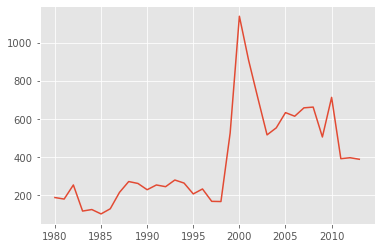

In [18]:
# buat line plot untuk imigrasi dari negara Indonesia ke Canada 1980-2013
df_indo = df_can.loc['Indonesia', years]
df_indo.plot()

Text(1993.5, 1000, "krisis moneter '98")

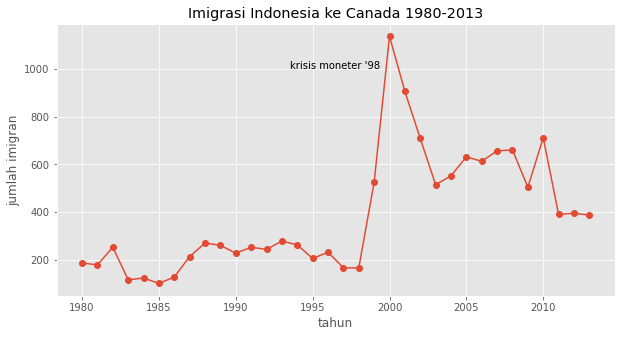

In [29]:
# kasih label
df_indo.plot(marker='o', figsize=(10,5))

plt.title("Imigrasi Indonesia ke Canada 1980-2013")
plt.xlabel("tahun")
plt.ylabel("jumlah imigran")

plt.text(1993.5,1000,"krisis moneter '98")

tren imigrasi Indonesia biasanya sekitar 200 orang per tahun ke Canada dari 1980-1998. Ada kenaikan tiba-tiba di tahun 1999-2003, kemudian rata2 jumlah imigran per tahun menetap di angka baru di sekitar 600 orang sampai 2011 dimana dia turun ke sekitar 400 orang per tahun.

line plot juga bisa untuk membandingkan bbrp tren, misalnya kita lihat perbedaan imigrasi Indonesia dan Singapore

In [25]:
df_indosg = df_can.loc[['Indonesia', 'Singapore'], years]
df_indosg

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Indonesia,186,178,252,115,123,100,127,213,270,260,...,552,632,613,657,661,504,712,390,395,387
Singapore,241,301,337,169,128,139,205,372,808,1269,...,311,392,298,690,734,366,805,219,146,141


<AxesSubplot:xlabel='Country'>

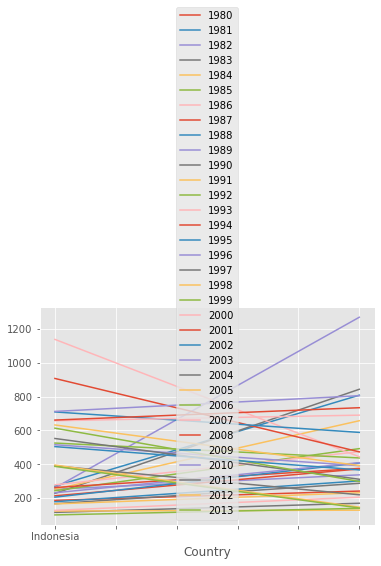

In [30]:
df_indosg.plot()

In [33]:
# kebalik jadi perlu kita transpose
df_indosg = df_indosg.T
df_indosg.head()

Country,Indonesia,Singapore
1980,186,241
1981,178,301
1982,252,337
1983,115,169
1984,123,128


<AxesSubplot:>

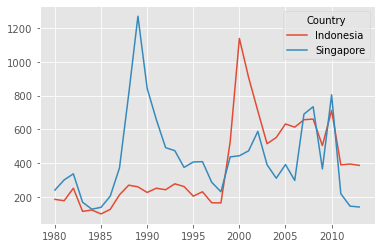

In [34]:
df_indosg.plot()

Text(1993.5, 1000, "krisis moneter '98")

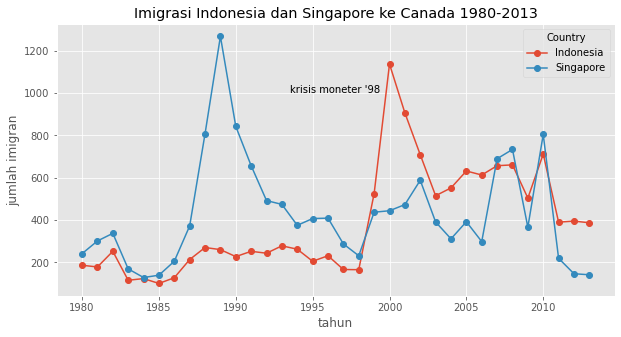

In [35]:
df_indosg.plot(marker='o', figsize=(10,5))

plt.title("Imigrasi Indonesia dan Singapore ke Canada 1980-2013")
plt.xlabel("tahun")
plt.ylabel("jumlah imigran")

plt.text(1993.5,1000,"krisis moneter '98")

tren imigrasi kedua negara ini awalnya lumayan mirip tapi di tahun 1987 terjadi lonjakan imigran di Singapore selama 5 tahunan. kemudian lonjakan yang mirip terjadi di Indonesia di tahun 1999-2003. sisanya tren nya mirip lagi.

# Area Plot
tujuan utama adalah untuk membandingkan dua data juga, tapi di area plot ada yang namanya stacked. kata lainnya adalah "stacked line plot" dimana datanya ditumpuk, dijumlahkan jadi satu. kita bisa melihat tren totalnya

Text(0, 0.5, 'jumlah imigran')

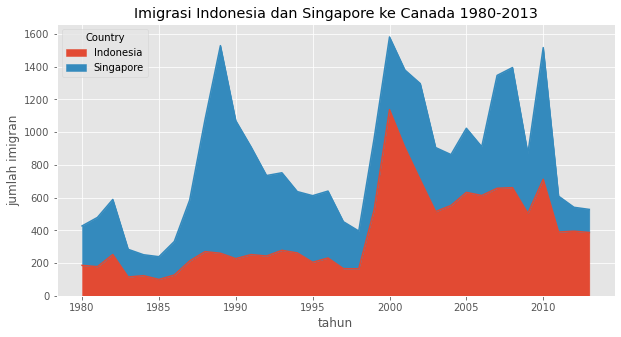

In [36]:
df_indosg.plot(kind="area", figsize=(10,5))

plt.title("Imigrasi Indonesia dan Singapore ke Canada 1980-2013")
plt.xlabel("tahun")
plt.ylabel("jumlah imigran")

kita bisa lihat tren gabungan dengan area plot yang stacked. perhatikan jumlah data yang dibandingkan jangan lebih dari 5.

In [38]:
# contoh seluruh 195 negara di area plot
# df_can[years].T.plot(kind="area", figsize=(10,5))

# plt.title("Imigrasi ke Canada 1980-2013")
# plt.xlabel("tahun")
# plt.ylabel("jumlah imigran")

# sangat berantakan, ada banyak cara lebih baik kalau mau lihat total imgrasi saja

Text(0, 0.5, 'jumlah imigran')

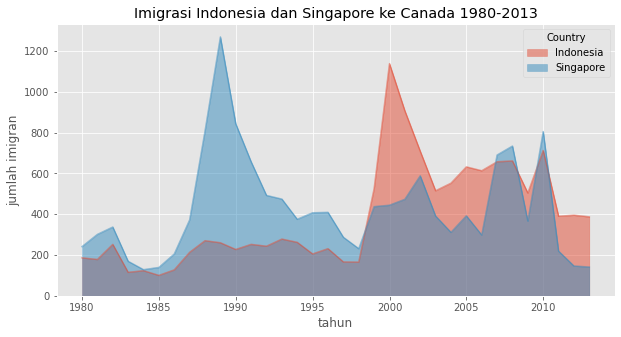

In [39]:
# area plot bisa tidak stack
df_indosg.plot(kind="area", stacked=False, figsize=(10,5))

plt.title("Imigrasi Indonesia dan Singapore ke Canada 1980-2013")
plt.xlabel("tahun")
plt.ylabel("jumlah imigran")

Text(0, 0.5, 'jumlah imigran')

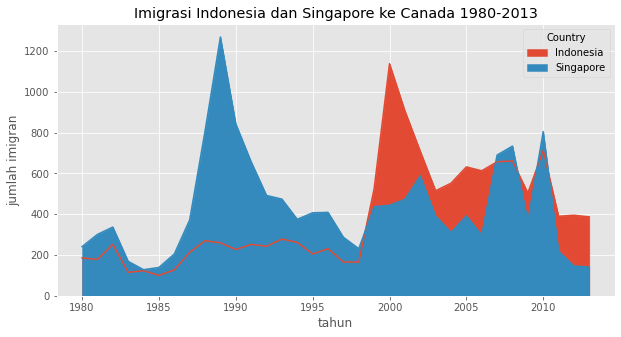

In [43]:
# ketebalan warna area plot bisa diganti dengan alpha
df_indosg.plot(kind="area", alpha=1.0, stacked=False, figsize=(10,5))
# alpha 0.1 = 10% ketebalan, tipis. alpha 1.0 = 100% warnanya tidak ada transparansi

plt.title("Imigrasi Indonesia dan Singapore ke Canada 1980-2013")
plt.xlabel("tahun")
plt.ylabel("jumlah imigran")

# Bar Chart
mirip line chart, bisa untuk lihat tren, tapi data bar chart kita bisa lihat skalanya karena selalu dimulai dari 0

Text(0, 0.5, 'jumlah imigran')

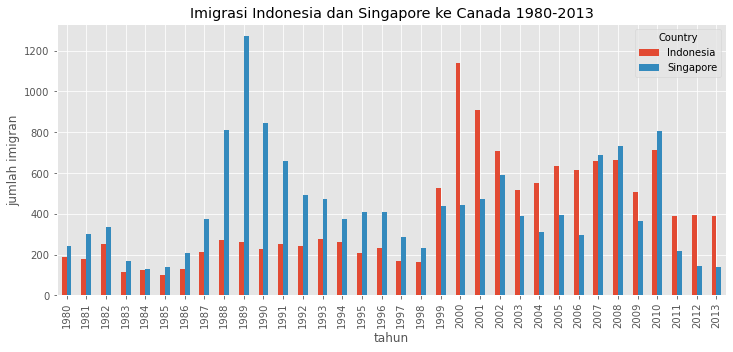

In [44]:
df_indosg.plot(kind="bar", stacked=False, figsize=(12,5))

plt.title("Imigrasi Indonesia dan Singapore ke Canada 1980-2013")
plt.xlabel("tahun")
plt.ylabel("jumlah imigran")

Text(0.5, 0, 'jumlah imigran')

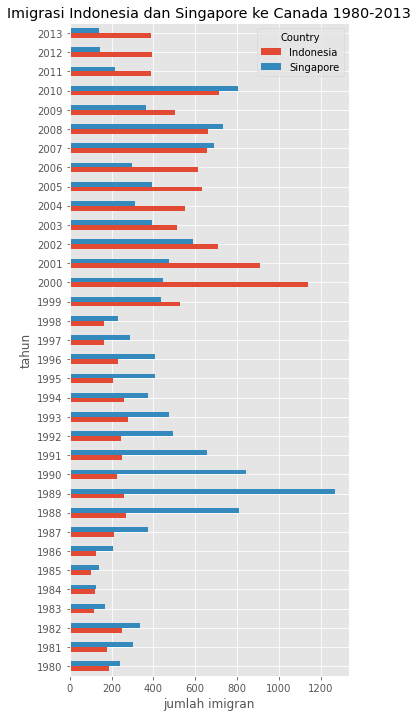

In [45]:
# ada juga tipe bar chart horizontal
df_indosg.plot(kind="barh", stacked=False, figsize=(5,12))

plt.title("Imigrasi Indonesia dan Singapore ke Canada 1980-2013")
plt.ylabel("tahun")
plt.xlabel("jumlah imigran")

Text(0, 0.5, 'jumlah imigran')

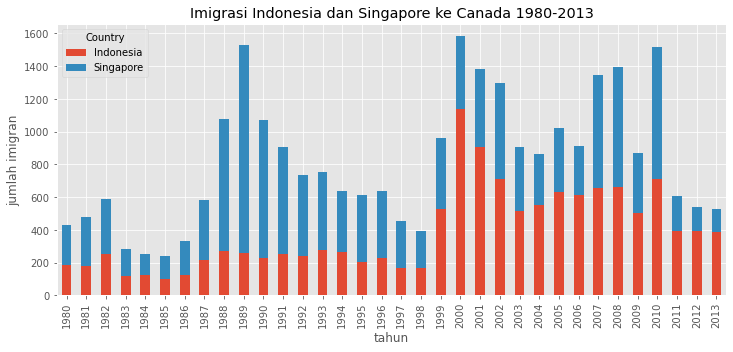

In [46]:
# bar chart bisa di stack juga
df_indosg.plot(kind="bar", stacked=True, figsize=(12,5))

plt.title("Imigrasi Indonesia dan Singapore ke Canada 1980-2013")
plt.xlabel("tahun")
plt.ylabel("jumlah imigran")

In [49]:
df_indosg.head()

Country,Indonesia,Singapore
1980,186,241
1981,178,301
1982,252,337
1983,115,169
1984,123,128


# Pie Chart
membandingkan proporsi data

In [50]:
# contoh, pie chart untuk bandingkan imigrasi Indo dan Sg di tahun 1989
df_pie1 = df_indosg.loc[1989]
df_pie1

Country
Indonesia     260
Singapore    1269
Name: 1989, dtype: int64

<AxesSubplot:ylabel='1989'>

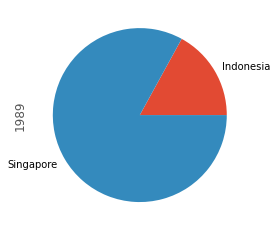

In [51]:
df_pie1.plot(kind="pie")

Text(0.5, 1.0, 'Imigrasi di tahun 1989 antara Indonesia dan Singapore')

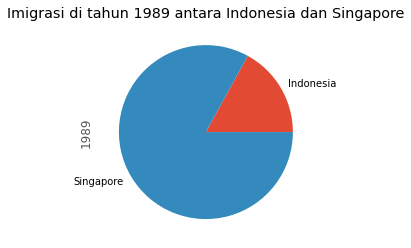

In [55]:
df_pie1.plot(kind="pie")

plt.title("Imigrasi di tahun 1989 antara Indonesia dan Singapore")

biasanya kita menggunakan pie chart untuk membandingkan gabungan data, proporsi setiap bagian seperti apa. contohnya, kita bisa bandingkan proporsi jumlah imigran per benua di tahun 1989

In [53]:
df_benua = df_can.groupby('Continent')[1989].sum()
df_benua

Continent
Africa                              9894
Asia                               60256
Europe                             60893
Latin America and the Caribbean    25060
Northern America                    6790
Oceania                             1539
Name: 1989, dtype: int64

<AxesSubplot:ylabel='1989'>

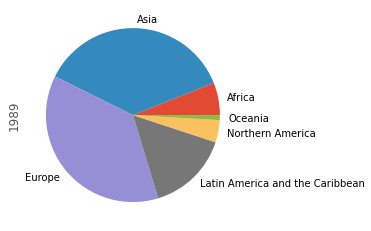

In [54]:
df_benua.plot(kind="pie")

pie chart punya banyak opsi juga untuk dipercantik. kita bisa tambahkan % nya, ganti warna, copotin potongannya, dll

(-1.1082309817149076,
 1.1154715582281107,
 -1.124539073057685,
 1.258243459398002)

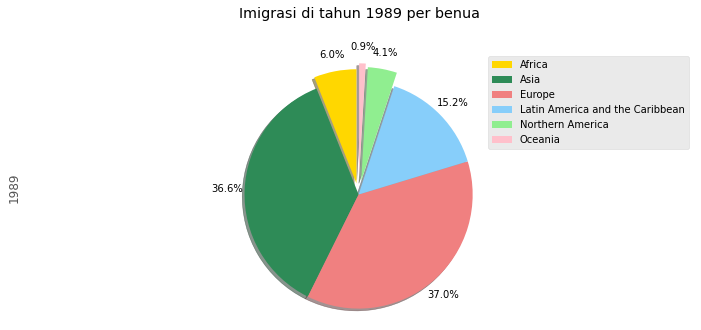

In [71]:
df_benua.plot(kind="pie", 
              startangle=90, #putar pie chart mulai darimana
              labels=None, # hapus label index dari pie chart
              figsize=(12,5), # ubah ukuran plot
              autopct="%1.1f%%", # nambahin % di pie chart
              pctdistance = 1.15, # membuat tulisan % nya menjauh dari tengah pie chart,
              shadow = True, #efek bayangan untuk pie nya,
              explode = [0.1, 0, 0, 0, 0.12, 0.15], # memberi tau posisi setiap potongan seberapa jauh dari tengah pie
              colors = ['gold', 'seagreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink'] # ubah warna per potong
             ) 

plt.title("Imigrasi di tahun 1989 per benua", y=1.1) # opsi y digunakan untuk memposisikan title di ketinggian tertentu
plt.legend(df_benua.index)
plt.axis('equal') # memaksa ukuran plot untuk menjadi figsize

di tahun 1989 proporsi imgrasi ke Canada antara benua Asua dan Eropa hampir sama. Kedua benua ini mendimunasi lebih dari 70% imigran Canada di tahun tersebut.

In [72]:
# contoh untuk bandingin total imigrasi 1980-2013
# bikin data Total dulu
df_can['Total'] = df_can[years].sum(axis=1)
df_can.head()

,Continent,Region,Developed,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [74]:
df_benua_total = df_can.groupby('Continent')['Total'].sum()
df_benua_total.head()

Continent
Africa                              618948
Asia                               3317794
Europe                             1410947
Latin America and the Caribbean     765148
Northern America                    241142
Name: Total, dtype: int64

(-1.1100177261682185, 1.1272740529519252, -1.10982659750036, 1.208874630296461)

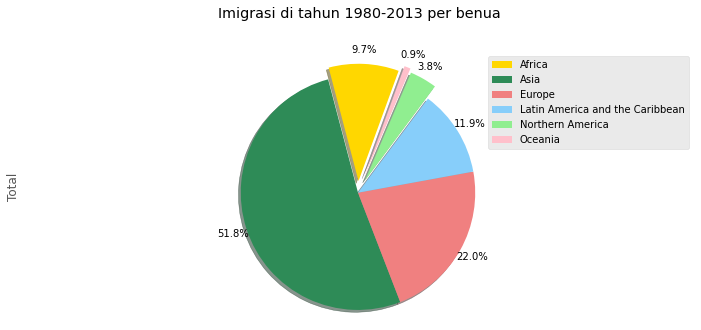

In [82]:
df_benua_total.plot(kind="pie", 
              startangle=70, #putar pie chart mulai darimana
              labels=None, # hapus label index dari pie chart
              figsize=(12,5), # ubah ukuran plot
              autopct="%1.1f%%", # nambahin % di pie chart
              pctdistance = 1.12, # membuat tulisan % nya menjauh dari tengah pie chart,
              shadow = True, #efek bayangan untuk pie nya,
              explode = [0.1, 0, 0, 0, 0.12, 0.15], # memberi tau posisi setiap potongan seberapa jauh dari tengah pie
              colors = ['gold', 'seagreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink'] # ubah warna per potong
             ) 

plt.title("Imigrasi di tahun 1980-2013 per benua", y=1.1) # opsi y digunakan untuk memposisikan title di ketinggian tertentu
plt.legend(df_benua_total.index)
plt.axis('equal') # memaksa ukuran plot untuk menjadi figsize

# Histogram
melihat frekuensi suatu kejadian terjadi

misalnya "berapa kali Indonesia kirim 100-200, 200-300, 300-400,.. orang ke Canada diantara 33 tahun terakhir (1980-2013)"

biasanya ada 10 bin "kejadian" atau range yang digunakan yang dihitung frekuensi nya.

kita bisa lihat Indonesia paling sering kirim berapa orang (dalam sebuah range bin) ke Canada di 33 tahun terakhir

In [83]:
df_indo

1980     186
1981     178
1982     252
1983     115
1984     123
1985     100
1986     127
1987     213
1988     270
1989     260
1990     227
1991     252
1992     243
1993     278
1994     262
1995     205
1996     231
1997     166
1998     165
1999     525
2000    1138
2001     907
2002     709
2003     515
2004     552
2005     632
2006     613
2007     657
2008     661
2009     504
2010     712
2011     390
2012     395
2013     387
Name: Indonesia, dtype: object

<AxesSubplot:ylabel='Frequency'>

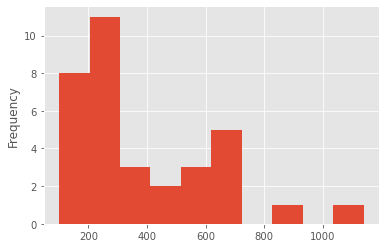

In [84]:
df_indo.plot(kind="hist")

perhatikan tanda x label tidak pas dengan bin nya, dengan range nya, kita buat pas dengan bantuan numpy

In [98]:
count, bin_edges = np.histogram(df_indo)
print(count)
print(bin_edges)

bin_edges = bin_edges.astype(int) # kalau desimal terlalu banyak tidak diterima xticks di plot
print(bin_edges)

[ 8 11  3  2  3  5  0  1  0  1]
[100.0 203.8 307.6 411.4 515.2 619.0 722.8 826.6 930.4 1034.1999999999998
 1138.0]
[ 100  203  307  411  515  619  722  826  930 1034 1138]


<AxesSubplot:ylabel='Frequency'>

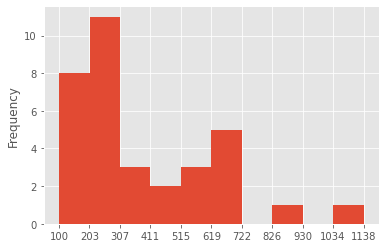

In [97]:
df_indo.plot(kind="hist", xticks = bin_edges)

Text(0.5, 0, 'jumlah imigran')

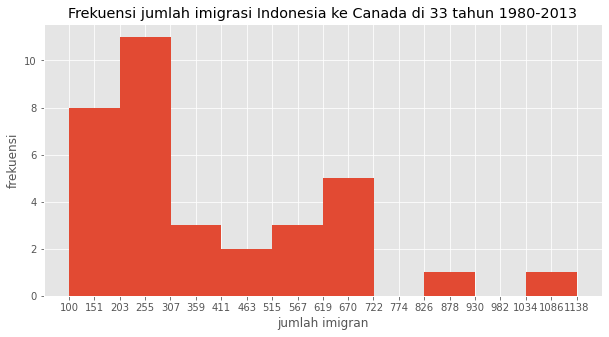

In [102]:
df_indo.plot(kind="hist", xticks = bin_edges, figsize=(10,5))

plt.title("Frekuensi jumlah imigrasi Indonesia ke Canada di 33 tahun 1980-2013")
plt.ylabel("frekuensi")
plt.xlabel("jumlah imigran")

[4 4 7 4 0 3 0 2 2 1 3 2 0 0 0 1 0 0 0 1]
[100.0 151.9 203.8 255.7 307.6 359.5 411.4 463.3 515.2 567.0999999999999
 619.0 670.9 722.8 774.6999999999999 826.6 878.5 930.4 982.3
 1034.1999999999998 1086.1 1138.0]
[ 100  151  203  255  307  359  411  463  515  567  619  670  722  774
  826  878  930  982 1034 1086 1138]


Text(0.5, 0, 'jumlah imigran')

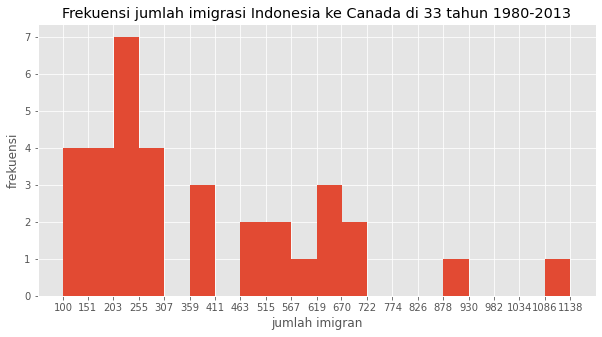

In [103]:
# contoh ganti total bin
n = 20 # anggap 20 bin

count, bin_edges = np.histogram(df_indo, bins=n)
print(count)
print(bin_edges)

bin_edges = bin_edges.astype(int) # kalau desimal terlalu banyak tidak diterima xticks di plot
print(bin_edges)

df_indo.plot(kind="hist", 
             xticks = bin_edges, 
             bins = n,
             figsize=(10,5))

plt.title("Frekuensi jumlah imigrasi Indonesia ke Canada di 33 tahun 1980-2013")
plt.ylabel("frekuensi")
plt.xlabel("jumlah imigran")

Indonesia paling sering kirim orang sebanyak 203-255 orang dalam setahun. Terjadi 7 kali di 33 tahun terakhir.

# Boxplot
melihat data ini secara statistik

<AxesSubplot:>

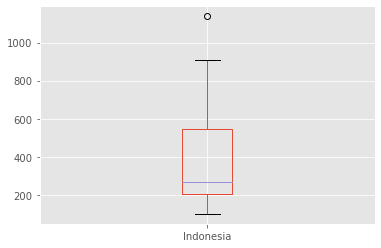

In [104]:
df_indo.plot(kind="box")

angka setiap garis merupakan angka statistik

In [105]:
df_indo.describe() # sedikit karena series, ubah dulu jadi dataframe

count      34
unique     33
top       252
freq        2
Name: Indonesia, dtype: int64

In [107]:
df_indo = df_can.loc[['Indonesia'], years].T
df_indo.describe()

Country,Indonesia
count,34.000000
mean,386.764706
std,251.233449
min,100.000000
25%,207.000000
50%,266.000000
75%,545.250000
max,1138.000000


Text(0, 0.5, 'jumlah imigran')

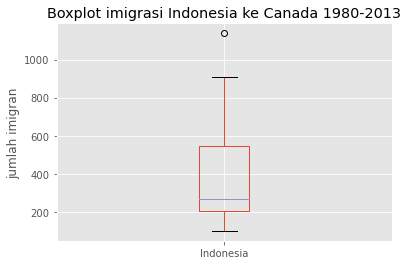

In [112]:
df_indo.plot(kind="box")

plt.title("Boxplot imigrasi Indonesia ke Canada 1980-2013")
plt.ylabel("jumlah imigran")

Text(0, 0.5, 'jumlah imigran')

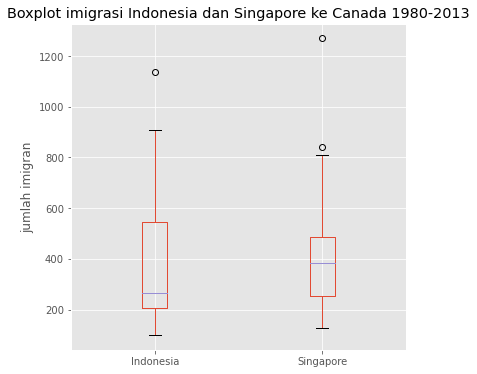

In [116]:
# bisa juga bandingkan bbrp negara
df_indosg.plot(kind="box", figsize=(6, 6))

plt.title("Boxplot imigrasi Indonesia dan Singapore ke Canada 1980-2013")
plt.ylabel("jumlah imigran")

Singapore lebih konsisten kirim jumlah orangnya berapa tahun ke tahun, dan rata2 kirim orang lebih banyak, juga punya outlier lebih tinggi dari Indonesia

Text(0.5, 0, 'jumlah imigran')

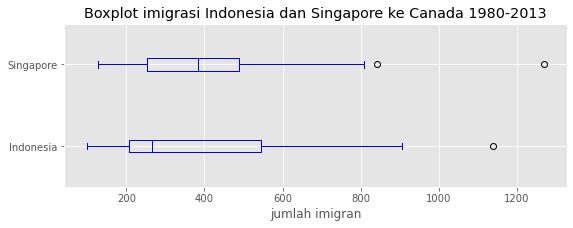

In [121]:
# juga bisa dibuat horizontal
df_indosg.plot(kind="box", 
               vert=False, # bikin boxplot horizontal
               figsize=(9, 3),
               color="blue") # opsi ganti warna

plt.title("Boxplot imigrasi Indonesia dan Singapore ke Canada 1980-2013")
plt.xlabel("jumlah imigran")

# Scatter Plot
scatter plot digunakan untuk melihat korelasi antara dua data

misal: adakah korelasi antara jumlah imigran yang dikirim Indonesia dengan jumlah imigran yang dikirim Singapore?

Text(0.5, 1.0, 'Imigrasi Indonesia vs Singapore ke Canada 1980-2013')

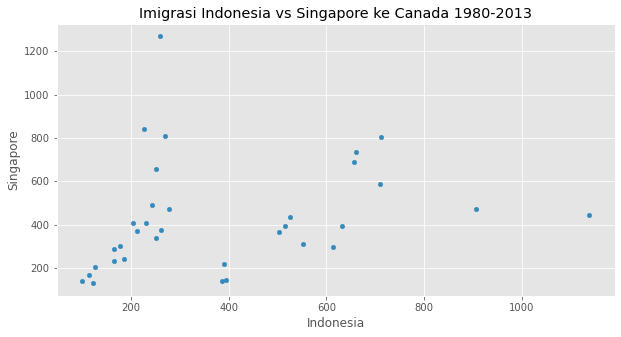

In [126]:
df_indosg.plot(kind="scatter", x="Indonesia", y="Singapore", figsize=(10,5))

plt.title("Imigrasi Indonesia vs Singapore ke Canada 1980-2013")

sepertinya tidak ada korelasi antara jumlah imigran Indonesia dan Singapore

misal: apakah ada korelasi antara tahun dengan jumlah imigran yang masuk ke Canada?

In [131]:
# bikin dulu data total imigran per tahun
total_pertahun = df_can[years].sum(axis=0)
# total_pertahun

# ubah jadi DataFrame
df_totalpertahun = pd.DataFrame({"Tahun": total_pertahun.index, "Total": total_pertahun.values})
df_totalpertahun.head()

,Tahun,Total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


Text(0.5, 1.0, 'Total Imigrasi 195 Negara ke Canada selama 1980-2013')

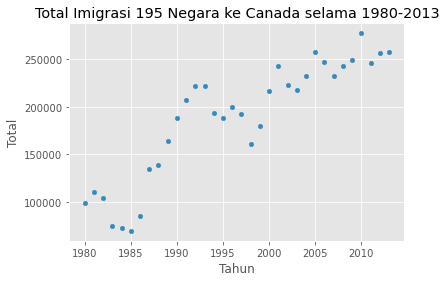

In [133]:
df_totalpertahun.plot(kind="scatter", x="Tahun", y="Total")

plt.title("Total Imigrasi 195 Negara ke Canada selama 1980-2013")

sepertinya ada korelasi positif antara tahun dengan total imigrasi ke Canada. sepertinya tahun semakin naik, jumlah imigran juga semakin bertambah.